# *Breast Cancer Prediction*

**Problem Statement**: To create a predictive model that can accurately classify breast
cancer cases as benign or malignant based on a set of relevant features. By leveraging
historical data and applying machine learning techniques, we aim to develop a reliable tool for
assisting medical professionals in diagnosing breast cancer.

Breast cancer, a significant health concern, poses life-threatening risks. This project is dedicated to creating a predictive model aimed at early breast cancer diagnosis, a crucial factor in effective treatment and improved patient outcomes.

**Project Objective:**

Our primary goal is to develop a precise predictive model capable of classifying breast tumors as benign or malignant. Through the meticulous analysis of patient data and tumor characteristics, we aim to empower medical professionals with essential information for making well-informed decisions about patient care.

**Dataset:**

We utilize an extensive dataset comprising medical features extracted from breast cancer biopsies. These features encompass critical details such as tumor size, cell shape, and mitotic count. Each record is meticulously labeled as benign or malignant.

**Methodology:**

1. **Data Preprocessing:** Rigorous data preprocessing is conducted, addressing missing values, scaling, and encoding categorical variables for comprehensive analysis.

2. **Model Development:** We employ a range of machine learning algorithms to develop and train predictive models, ensuring robustness and accuracy.

3. **Model Evaluation:** The models are rigorously evaluated using metrics including accuracy, precision, recall, and F1-score to gauge their effectiveness.

**Results and Impact:**

The successful creation of our breast cancer prediction model holds transformative potential for the healthcare landscape. Early diagnosis facilitated by our model can significantly enhance treatments and patient outcomes. This project stands as a pivotal contribution to medical data analysis, emphasizing the value of data-driven approaches in shaping the future of healthcare.

Our dedicated focus on early breast cancer diagnosis exemplifies the power of data-driven methodologies in healthcare. By enabling timely and precise breast cancer diagnoses, our work not only saves lives but also elevates the standard of patient care. This project serves as a testament to the transformative impact of data-driven solutions in addressing critical real-world health challenges.



# Problem Statement

Breast cancer, a significant global concern, requires early detection for effective treatment. This project focuses on building a precise predictive model to aid medical professionals in timely and accurate breast cancer diagnosis. Key challenges include addressing data complexity, ensuring high accuracy, and enabling the model's real-world application. The objective is to develop a universally applicable, reliable, and accessible tool for early breast cancer detection, ultimately improving patient care.

# Initiating Exploration!

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt

### Dataset Loading

In [3]:
# Load Dataset
import pandas as pd
df = pd.read_csv('breast_cancer_data.csv')

### Dataset First View

In [ ]:
# Dataset First Look
# View top 5 rows of the dataset
df.head()

In [ ]:
# View last 5 rows of the dataset
df.tail()

In [2]:
import pandas as pd
df = pd.read_csv('breast_cancer_data.csv')

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

### Dataset Information

In [ ]:
# Dataset Info
# Checking information about the dataset using info
df.info()

#### Duplicate Values

In [ ]:
# Checking Dataset Duplicate Value Count
df.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
#Checking missing values/null values count for each column
df.isnull().sum()

### What did you know about your dataset?

There are a total of 33 feature columns where 'diagnosis' is the dependent variable column.

The total number of observations(rows) are 569.

There are no duplicate rows in the dataset.

Also there are missing values in the column 'unnamed: 32'.

## **2. Understanding Your Variables**

In [ ]:
# Dataset Columns
df.columns

In [ ]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable using a for loop
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

## **3. Data Wrangling**

### Data Wrangling Code

In [ ]:
# Getting mean columns with diagnosis
m_col = ['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

In [ ]:
# Getting se columns with diagnosis
s_col = ['diagnosis','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']

In [ ]:
# Getting worst columns with diagnosis
w_col = ['diagnosis','radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [ ]:
m_col

In [ ]:
s_col

In [ ]:
w_col

### What all manipulations have you done and insights you found?

Defined the mean columns, se columns and worst columns for ease of plotting graphs.


## **Data Visualization : Understand the relationships between variables**

**Understanding the target variable**

This visualization shows the proportion of each class in our dataset.

A balanced dataset is often ideal for training. If the data is heavily skewed (e.g., 90% Benign), the model might struggle to learn the patterns of the smaller class (Malignant). As you can see below, our data is relatively well-distributed.

In [ ]:
# Visualization for Distrubution of dependent Variable

import seaborn as sns             #data visualization library
import matplotlib.pyplot as plt   #plotting library

# Dependant Column Value Counts
print(df.diagnosis.value_counts())
print(" ")

# Color palette selection
colors = sns.color_palette("Paired")

# Plotting data on chart
plt.figure(figsize=(10,6))
textprops = {'fontsize':11}
plt.pie(df['diagnosis'].value_counts(), labels=['Benign (%)','Malignant (%)'], startangle=90,colors=colors, autopct="%1.1f%%",textprops = textprops)
plt.title('Diagnosis (%)', fontsize=15,weight='bold')

# Displaying chart
plt.show()

**Feature Relationship - Size vs Texture**

This scatter plot helps us visualize the relationship between two common tumor characteristics: size (radius_mean) and texture (texture_mean).

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot to visualize relationship between radius_mean and texture_mean
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='radius_mean', y='texture_mean', hue='diagnosis', s=80)
plt.title('Scatter Plot of Radius Mean vs Texture Mean',weight='bold', fontsize=14)
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.legend(title='Diagnosis')
plt.show()


## **Feature Engineering and Data Preprocessing**


####  **Data Cleaning**

Based on the data information, there's an Unnamed: 32 column that seems to be entirely empty and should be removed.

In [7]:
df=df.drop(columns=['Unnamed: 32'], axis=1)

#### **Feature Selection**

The 'id' column is simply an identifier and doesnt help the model predict so we simply drop it

In [8]:
# Select features wisely to avoid overfitting
df.drop("id",axis=1, inplace=True)

In [ ]:
df

#### **Categorical Encoding**

Machine learning models require numerical input. We convert the diagnosis column from text ('M', 'B') into numbers:

Malignant (M) → 1

Benign (B) → 0

In [10]:
# Encoding the categorical column
df['diagnosis']=df['diagnosis'].map({'B':0,'M':1})

In [ ]:
df

#### **Data Splitting - Features and Target**
We separate the dataset into:

- X (Features): The data (input variables) used to make the prediction.

- y (Target): The result we are trying to predict (diagnosis).

In [12]:
from sklearn.model_selection import train_test_split

# Separating features and target variable
X = df.drop('diagnosis',axis=1)
y = df['diagnosis']


**Train and Test Split**

We must split the data into Training and Testing sets:

- Training Set: Used to train the model (the model learns patterns from this data).

- Testing Set: Used to evaluate the model on data it has not seen before. This simulates real-world performance.

In [13]:
# Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **Scaling the Features**

Feature scaling transforms all your input data so they have a similar range of values.

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Apply the StandardScaler to the training data (X_train) to standardize it
X_train = scaler.fit_transform(X_train)

# Apply the same standardization to the testing data (X_test) to maintain consistency
X_test = scaler.transform(X_test)

## **Modelling**


### **Random Forest Classifier**

Instead of relying on a single large Decision Tree (which is prone to errors), Random Forest builds hundreds of smaller, independent trees using different parts of the data.

When it's time to make a final prediction for a new patient, every single tree in the forest casts a vote: "Benign" or "Malignant." The diagnosis that receives the most votes (the majority vote) is the model's final answer.


<img src=https://miro.medium.com/v2/resize:fit:4800/format:webp/1*hmtbIgxoflflJqMJ_UHwXw.jpeg width="800" height="400">



<img src="/content/decision tree example.png" width="400">


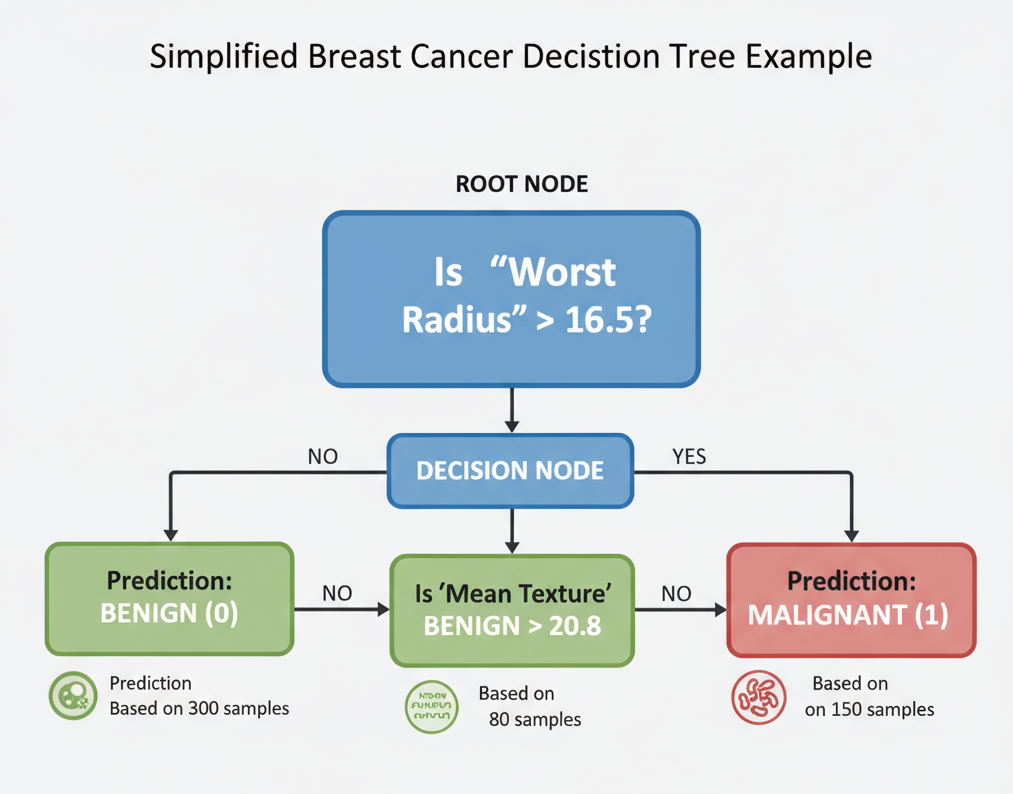

In [29]:
from IPython.display import Image, display
display(Image(filename="/content/decision tree example.png",width=500, height=400))

In [26]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)


### **Evaluating the models performance**

The most important step is evaluating our model's performance to ensure it can make reliable predictions.



**Confusion Matrix**
| | **Predicted Benign (0)** | **Predicted Malignant (1)** |
| :---: | :---: | :---: |
| **Actual Benign (0)** | **True Negatives (TN)**  | **False Positives (FP)**  |
| **Actual Malignant (1)** | **False Negatives (FN)**  | **True Positives (TP)** |

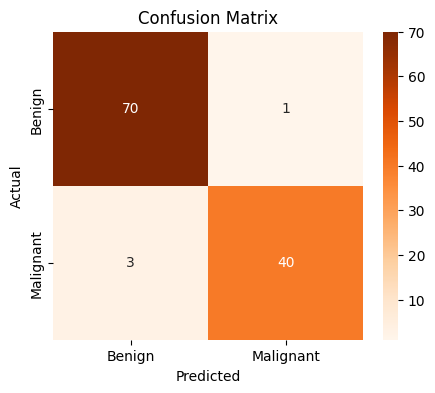

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
import tabulate

# Show the confusion matrix as a heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [28]:
# Print a detailed classification report
print('Classification Report:')
cr_test=classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'],output_dict=True)
print("\nTest Classification Report:")
crt2 = pd.DataFrame(cr_test).T
print(crt2.to_markdown())

Classification Report:

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| Benign       |    0.958904 | 0.985915 |   0.972222 |  71        |
| Malignant    |    0.97561  | 0.930233 |   0.952381 |  43        |
| accuracy     |    0.964912 | 0.964912 |   0.964912 |   0.964912 |
| macro avg    |    0.967257 | 0.958074 |   0.962302 | 114        |
| weighted avg |    0.965205 | 0.964912 |   0.964738 | 114        |


**ROC AUC Curve**


The ROC Curve (Receiver Operating Characteristic Curve) and the AUC (Area Under the Curve) help us judge how well a model can distinguish between two classes

Test ROC AUC: 0.9580740255486406


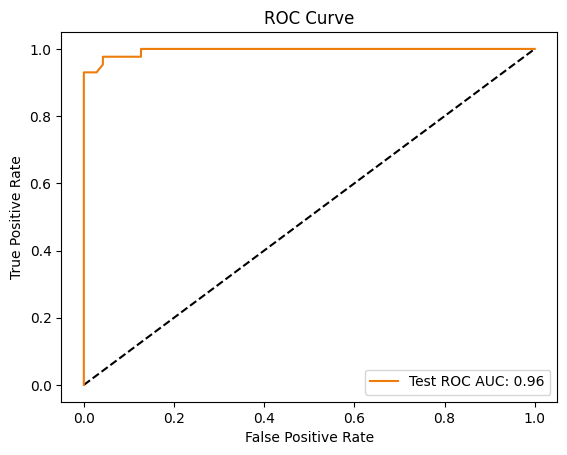

In [29]:
# Calculate ROC AUC score
roc_auc_test = roc_auc_score(y_test, y_pred)
print("Test ROC AUC:", roc_auc_test)

y_pred_prob = rf.predict_proba(X_test)[:, 1] # Probability estimates for the positive class
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_test, tpr_test, label="Test ROC AUC: {:.2f}".format(roc_auc_test),color="#ee7c09")
plt.legend()
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


### **Logistic Regression**

In [31]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Initialize and train the Logistic Regression
rf = LogisticRegression(max_iter=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

**Confusion Matrix**

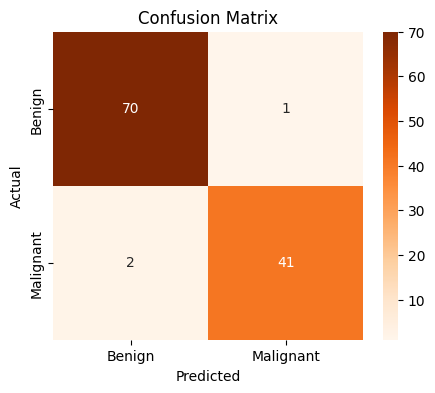

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
import tabulate

# Show the confusion matrix as a heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Classification Report**

In [33]:
# Print a detailed classification report
print('Classification Report:')
cr_test=classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'],output_dict=True)
print("\nTest Classification Report:")
crt2 = pd.DataFrame(cr_test).T
print(crt2.to_markdown())

Classification Report:

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| Benign       |    0.972222 | 0.985915 |   0.979021 |  71        |
| Malignant    |    0.97619  | 0.953488 |   0.964706 |  43        |
| accuracy     |    0.973684 | 0.973684 |   0.973684 |   0.973684 |
| macro avg    |    0.974206 | 0.969702 |   0.971863 | 114        |
| weighted avg |    0.973719 | 0.973684 |   0.973621 | 114        |


**ROC AUC Curve**

Test ROC AUC: 0.9697019325253848


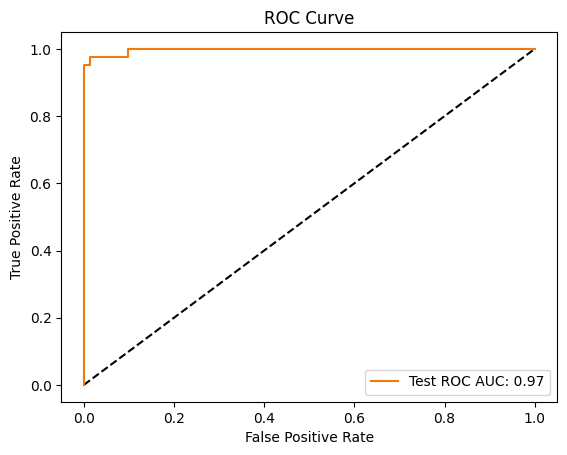

In [34]:
# Calculate ROC AUC score
roc_auc_test = roc_auc_score(y_test, y_pred)
print("Test ROC AUC:", roc_auc_test)

y_pred_prob = rf.predict_proba(X_test)[:, 1] # Probability estimates for the positive class
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_test, tpr_test, label="Test ROC AUC: {:.2f}".format(roc_auc_test),color="#ee7c09")
plt.legend()
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
